# Importing Libraries and Dependencies

In [1]:
import os
import requests, zipfile, io
import shutil

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

* Checking and deleting all the files in the workspace.

In [2]:
try:
    folder_path = "/kaggle/working/"
    shutil.rmtree(folder_path)
    print('Folder and its content removed')
except:
    print('Folder not deleted')

Folder not deleted


* Downloading the dataset from `https://archive.ics.uci.edu/static/public/501/beijing+multi+site+air+quality+data.zip`.
* Extracting all the data-files from the zip and deleting the zip file.

In [3]:
zip_file_url = "https://archive.ics.uci.edu/static/public/501/beijing+multi+site+air+quality+data.zip"
r = requests.get(zip_file_url)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extract("PRSA2017_Data_20130301-20170228.zip","/kaggle/working/")

f = zipfile.ZipFile("/kaggle/working/PRSA2017_Data_20130301-20170228.zip")
f.extractall("/kaggle/working/")

try:
    os.remove("PRSA2017_Data_20130301-20170228.zip")
except:
    print("No zip file to remove")

* Printing all the Extracted file name

In [4]:
os.chdir("/kaggle/working/PRSA_Data_20130301-20170228")

print("Previous File Names:")
for data_file in os.listdir(os.getcwd()):
    print('\t' + data_file)
    file_name = list(data_file.split('_'))
    os.rename(data_file, str(file_name[2])+'.csv')

Previous File Names:
	PRSA_Data_Dongsi_20130301-20170228.csv
	PRSA_Data_Shunyi_20130301-20170228.csv
	PRSA_Data_Huairou_20130301-20170228.csv
	PRSA_Data_Nongzhanguan_20130301-20170228.csv
	PRSA_Data_Guanyuan_20130301-20170228.csv
	PRSA_Data_Tiantan_20130301-20170228.csv
	PRSA_Data_Changping_20130301-20170228.csv
	PRSA_Data_Gucheng_20130301-20170228.csv
	PRSA_Data_Wanshouxigong_20130301-20170228.csv
	PRSA_Data_Dingling_20130301-20170228.csv
	PRSA_Data_Wanliu_20130301-20170228.csv
	PRSA_Data_Aotizhongxin_20130301-20170228.csv


* Printing the File names after renameing, and storing their path into a list

In [5]:
print("New File Names:")
file_url_list = []
for file_name in os.listdir(os.getcwd()):
    print("\t" + file_name)
    file_url_list.append(os.getcwd()+'/'+file_name)

New File Names:
	Tiantan.csv
	Shunyi.csv
	Gucheng.csv
	Changping.csv
	Aotizhongxin.csv
	Wanshouxigong.csv
	Dongsi.csv
	Huairou.csv
	Nongzhanguan.csv
	Dingling.csv
	Wanliu.csv
	Guanyuan.csv


In [6]:
file_url_list

['/kaggle/working/PRSA_Data_20130301-20170228/Tiantan.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Shunyi.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Gucheng.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Changping.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Aotizhongxin.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Wanshouxigong.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Dongsi.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Huairou.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Nongzhanguan.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Dingling.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Wanliu.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Guanyuan.csv']

# Data Pre-processing

In [7]:
df_0 = pd.read_csv(file_url_list[0])
df_0.drop(columns=['No'], inplace=True)
df_0

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


In [8]:
df_0['timestamp'] = pd.to_datetime(df_0[["year", "month", "day", "hour"]])

In [9]:
df_0.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

In [10]:
df_0

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,timestamp
0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan,2017-02-28 19:00:00
35060,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan,2017-02-28 20:00:00
35061,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan,2017-02-28 21:00:00
35062,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan,2017-02-28 22:00:00


In [11]:
df_0.dtypes

PM2.5               float64
PM10                float64
SO2                 float64
NO2                 float64
CO                  float64
O3                  float64
TEMP                float64
PRES                float64
DEWP                float64
RAIN                float64
wd                   object
WSPM                float64
station              object
timestamp    datetime64[ns]
dtype: object

Text(0.5, 1.0, 'O3 over the Timeframe')

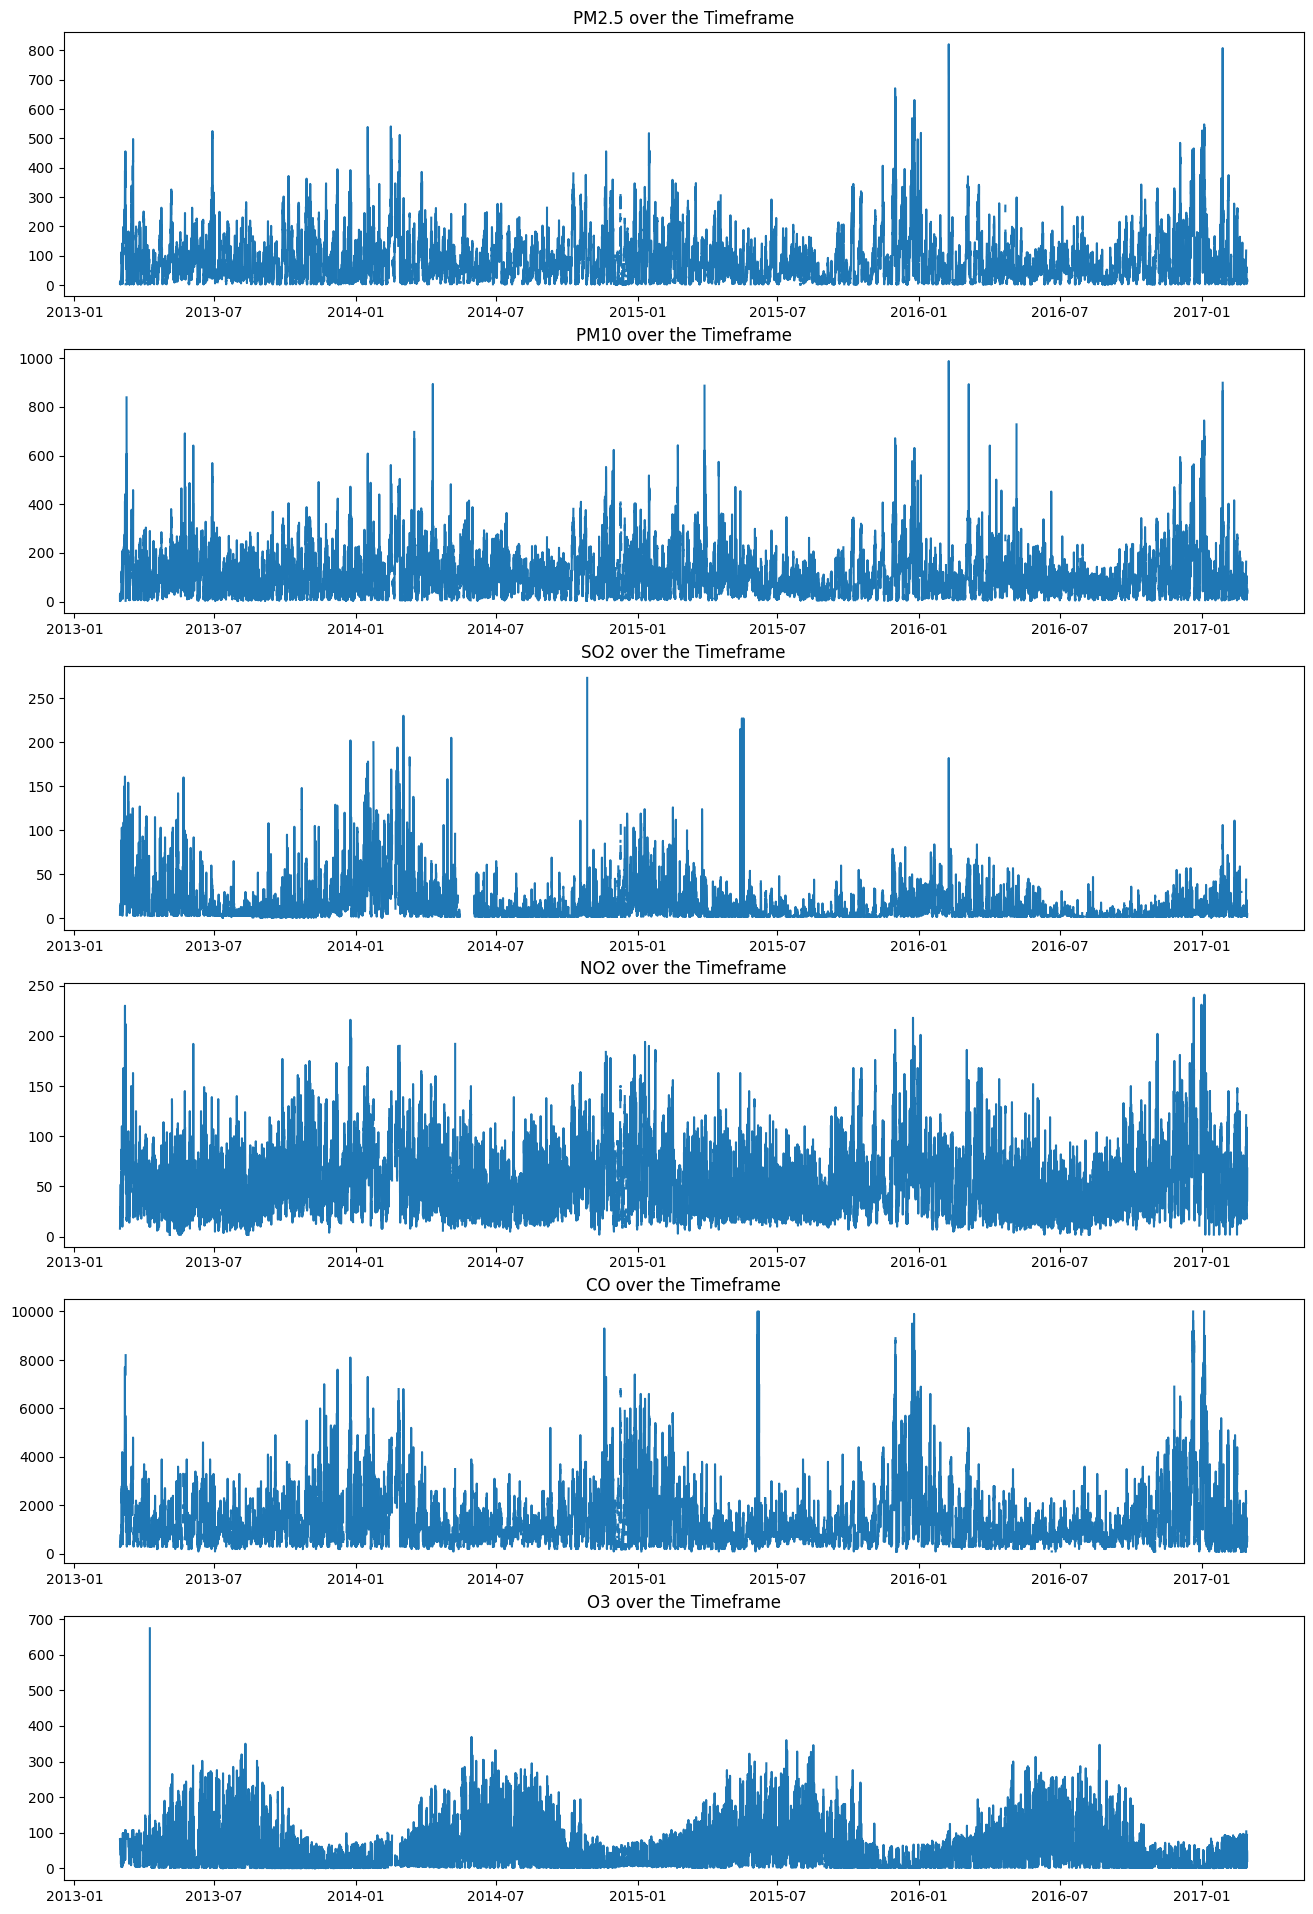

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(16,24))

ax[0].plot(df_0['timestamp'], np.array(df_0['PM2.5']), linestyle='-')
ax[0].set_title("PM2.5 over the Timeframe")

ax[1].plot(df_0['timestamp'], np.array(df_0['PM10']), linestyle='-')
ax[1].set_title("PM10 over the Timeframe")

ax[2].plot(df_0['timestamp'], np.array(df_0['SO2']), linestyle='-')
ax[2].set_title("SO2 over the Timeframe")

ax[3].plot(df_0['timestamp'], np.array(df_0['NO2']), linestyle='-')
ax[3].set_title("NO2 over the Timeframe")

ax[4].plot(df_0['timestamp'], np.array(df_0['CO']), linestyle='-')
ax[4].set_title("CO over the Timeframe")

ax[5].plot(df_0['timestamp'], np.array(df_0['O3']), linestyle='-')
ax[5].set_title("O3 over the Timeframe")

In [13]:
# Function to replace NaN values with the average of the non-NaN values above and below
def replace_nan_with_average(series):
    for i in range(1, len(series) - 1):
        if pd.isna(series[i]):
            start_index = i - 1
            end_index = i + 1
            while end_index < len(series) and pd.isna(series[end_index]):
                end_index += 1
            if end_index == len(series):
                end_index -= 1
        series.interpolate(method='linear', inplace=True)
    return series

# Apply the function to the 'value' column
df_0['CO'] = replace_nan_with_average(df_0['CO'])

In [14]:
df_0.dropna(inplace=True)

In [15]:
df_0.reset_index(inplace=True)
df_0

,index,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,timestamp
0,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33278,35055,9.0,9.0,2.0,22.0,300.0,91.0,15.4,1013.0,-15.0,0.0,NNW,3.3,Tiantan,2017-02-28 15:00:00
33279,35056,10.0,29.0,3.0,21.0,300.0,94.0,14.9,1012.6,-15.4,0.0,NW,2.1,Tiantan,2017-02-28 16:00:00
33280,35061,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan,2017-02-28 21:00:00
33281,35062,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan,2017-02-28 22:00:00


Text(0.5, 1.0, 'O3 over the Timeframe')

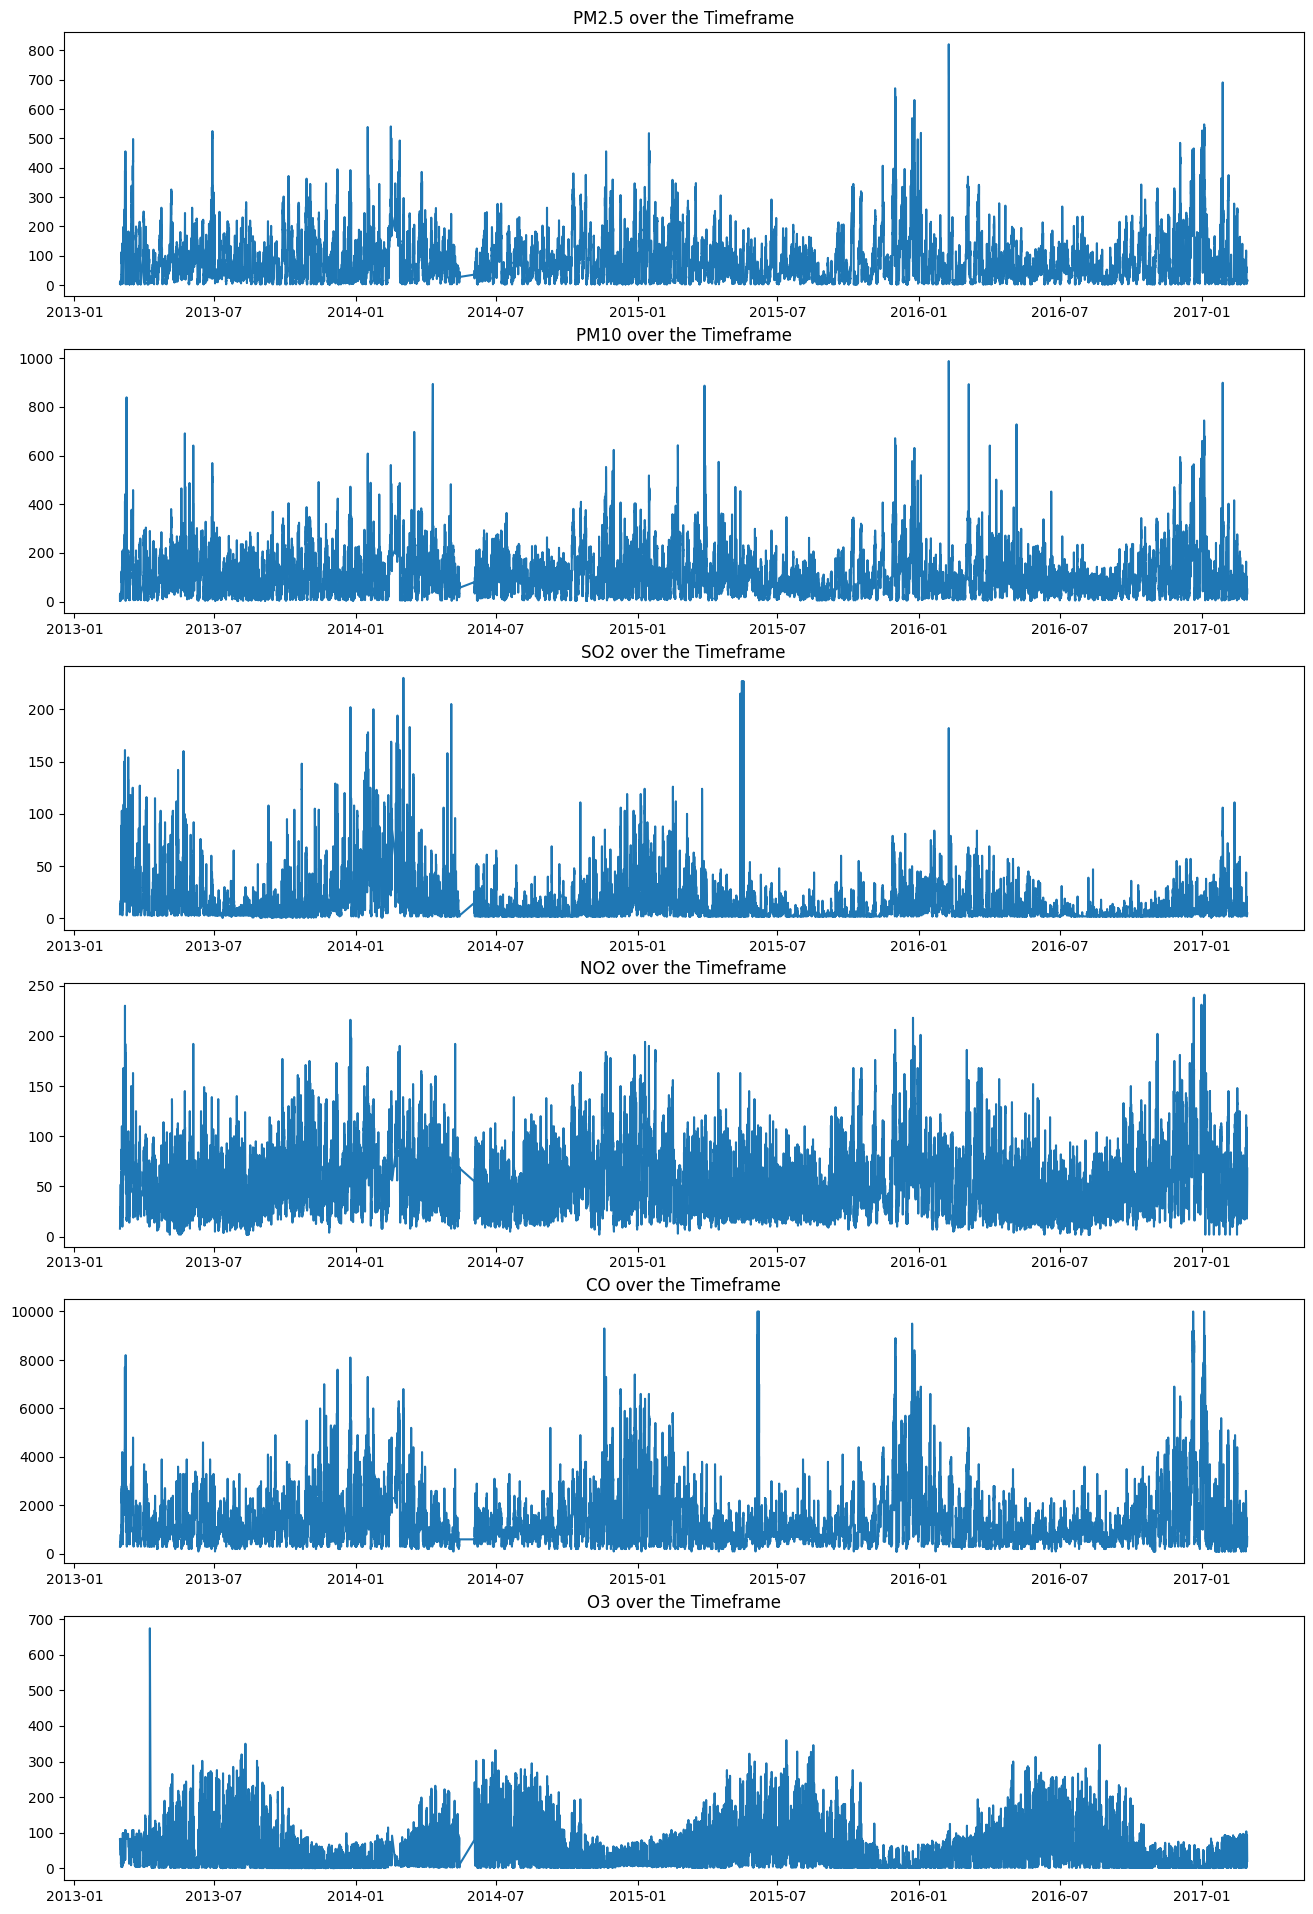

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(16,24))

ax[0].plot(df_0['timestamp'], np.array(df_0['PM2.5']), linestyle='-')
ax[0].set_title("PM2.5 over the Timeframe")

ax[1].plot(df_0['timestamp'], np.array(df_0['PM10']), linestyle='-')
ax[1].set_title("PM10 over the Timeframe")

ax[2].plot(df_0['timestamp'], np.array(df_0['SO2']), linestyle='-')
ax[2].set_title("SO2 over the Timeframe")

ax[3].plot(df_0['timestamp'], np.array(df_0['NO2']), linestyle='-')
ax[3].set_title("NO2 over the Timeframe")

ax[4].plot(df_0['timestamp'], np.array(df_0['CO']), linestyle='-')
ax[4].set_title("CO over the Timeframe")

ax[5].plot(df_0['timestamp'], np.array(df_0['O3']), linestyle='-')
ax[5].set_title("O3 over the Timeframe")

Text(0.5, 1.0, 'WSPM over the Timeframe')

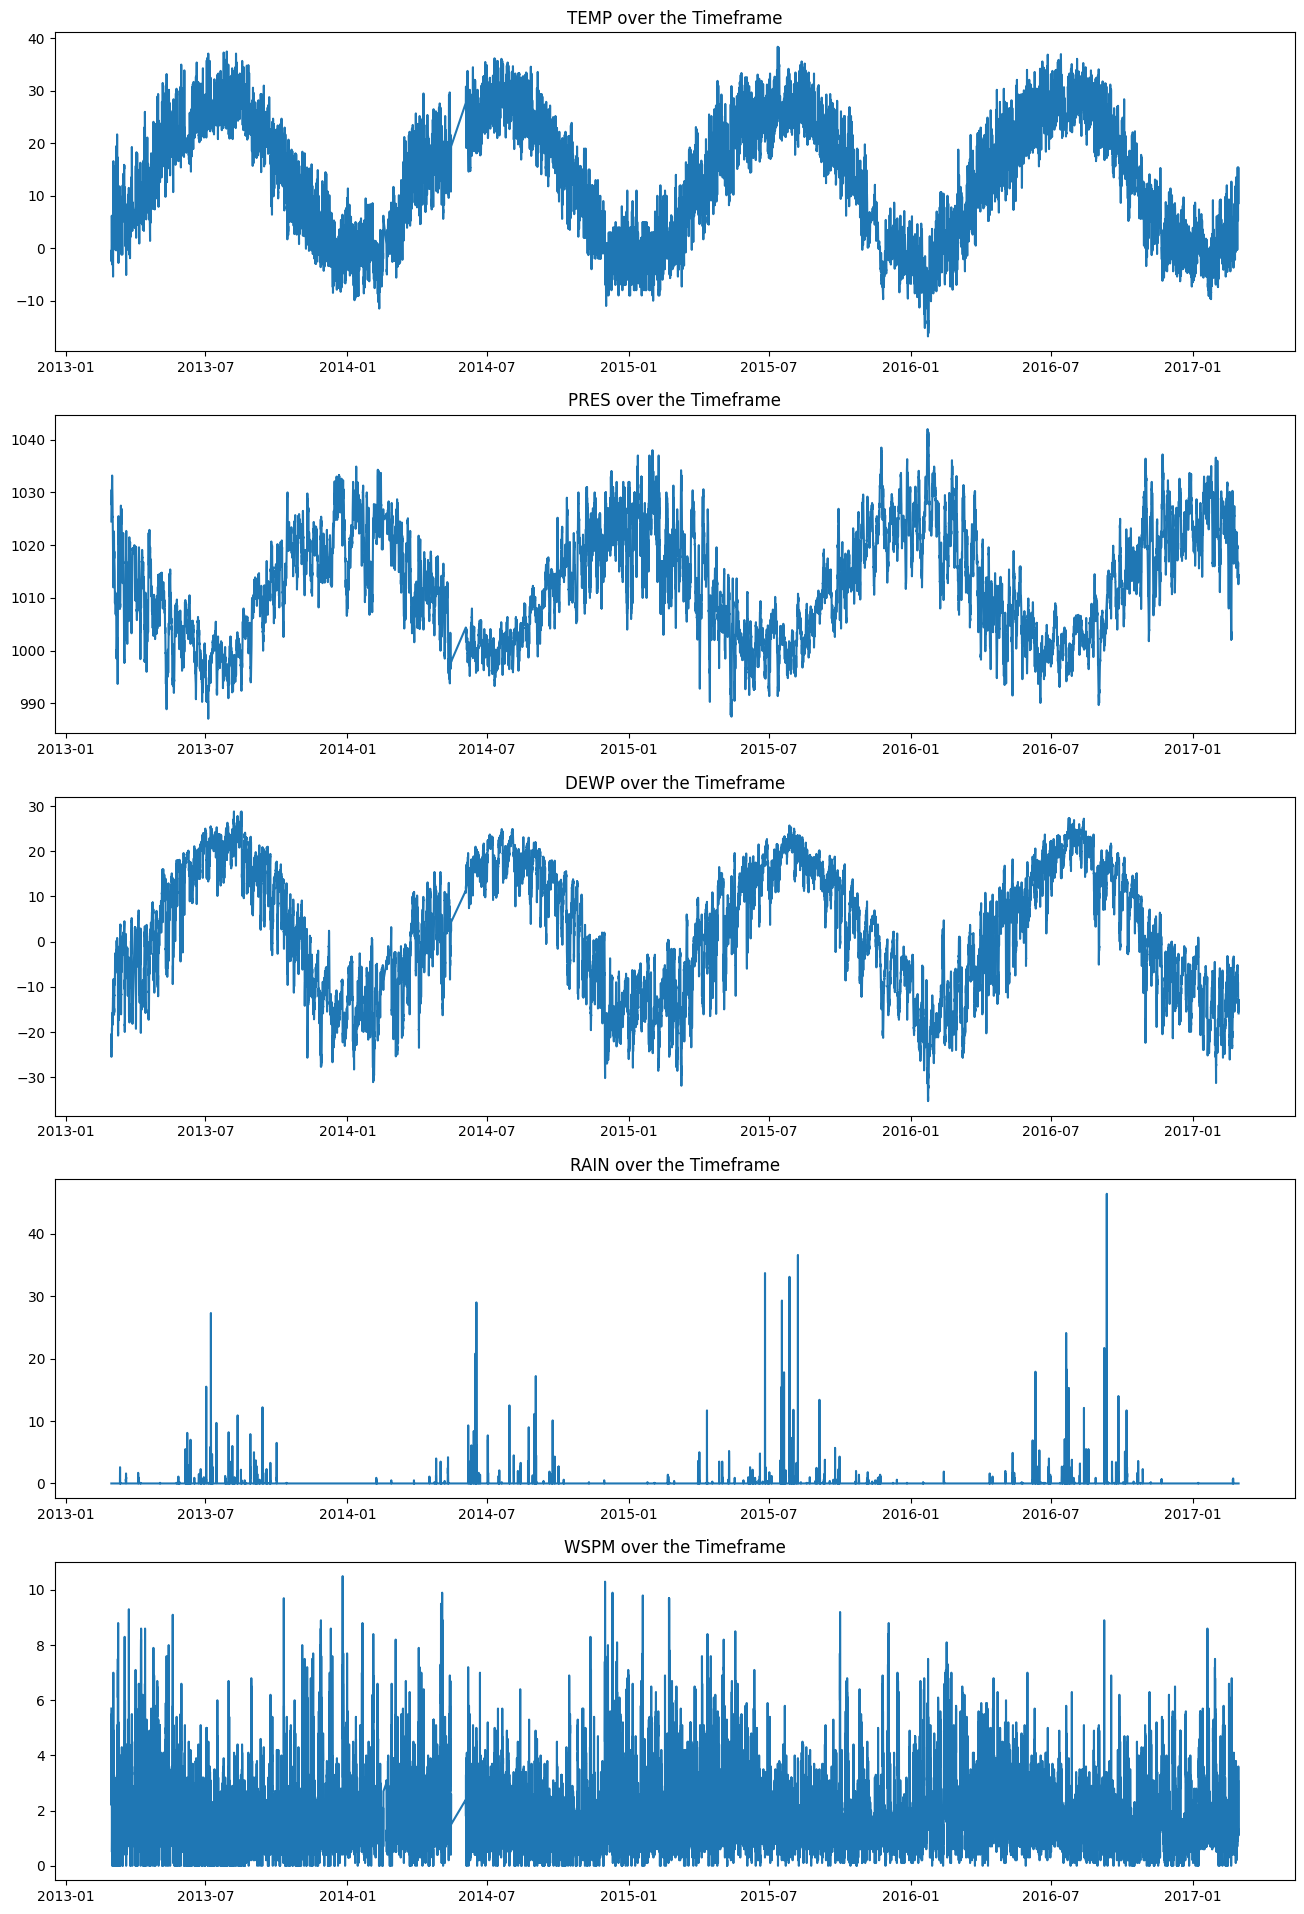

In [17]:
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(16,24))

ax[0].plot(df_0['timestamp'], np.array(df_0['TEMP']), linestyle='-')
ax[0].set_title("TEMP over the Timeframe")

ax[1].plot(df_0['timestamp'], np.array(df_0['PRES']), linestyle='-')
ax[1].set_title("PRES over the Timeframe")

ax[2].plot(df_0['timestamp'], np.array(df_0['DEWP']), linestyle='-')
ax[2].set_title("DEWP over the Timeframe")

ax[3].plot(df_0['timestamp'], np.array(df_0['RAIN']), linestyle='-')
ax[3].set_title("RAIN over the Timeframe")

ax[4].plot(df_0['timestamp'], np.array(df_0['WSPM']), linestyle='-')
ax[4].set_title("WSPM over the Timeframe")

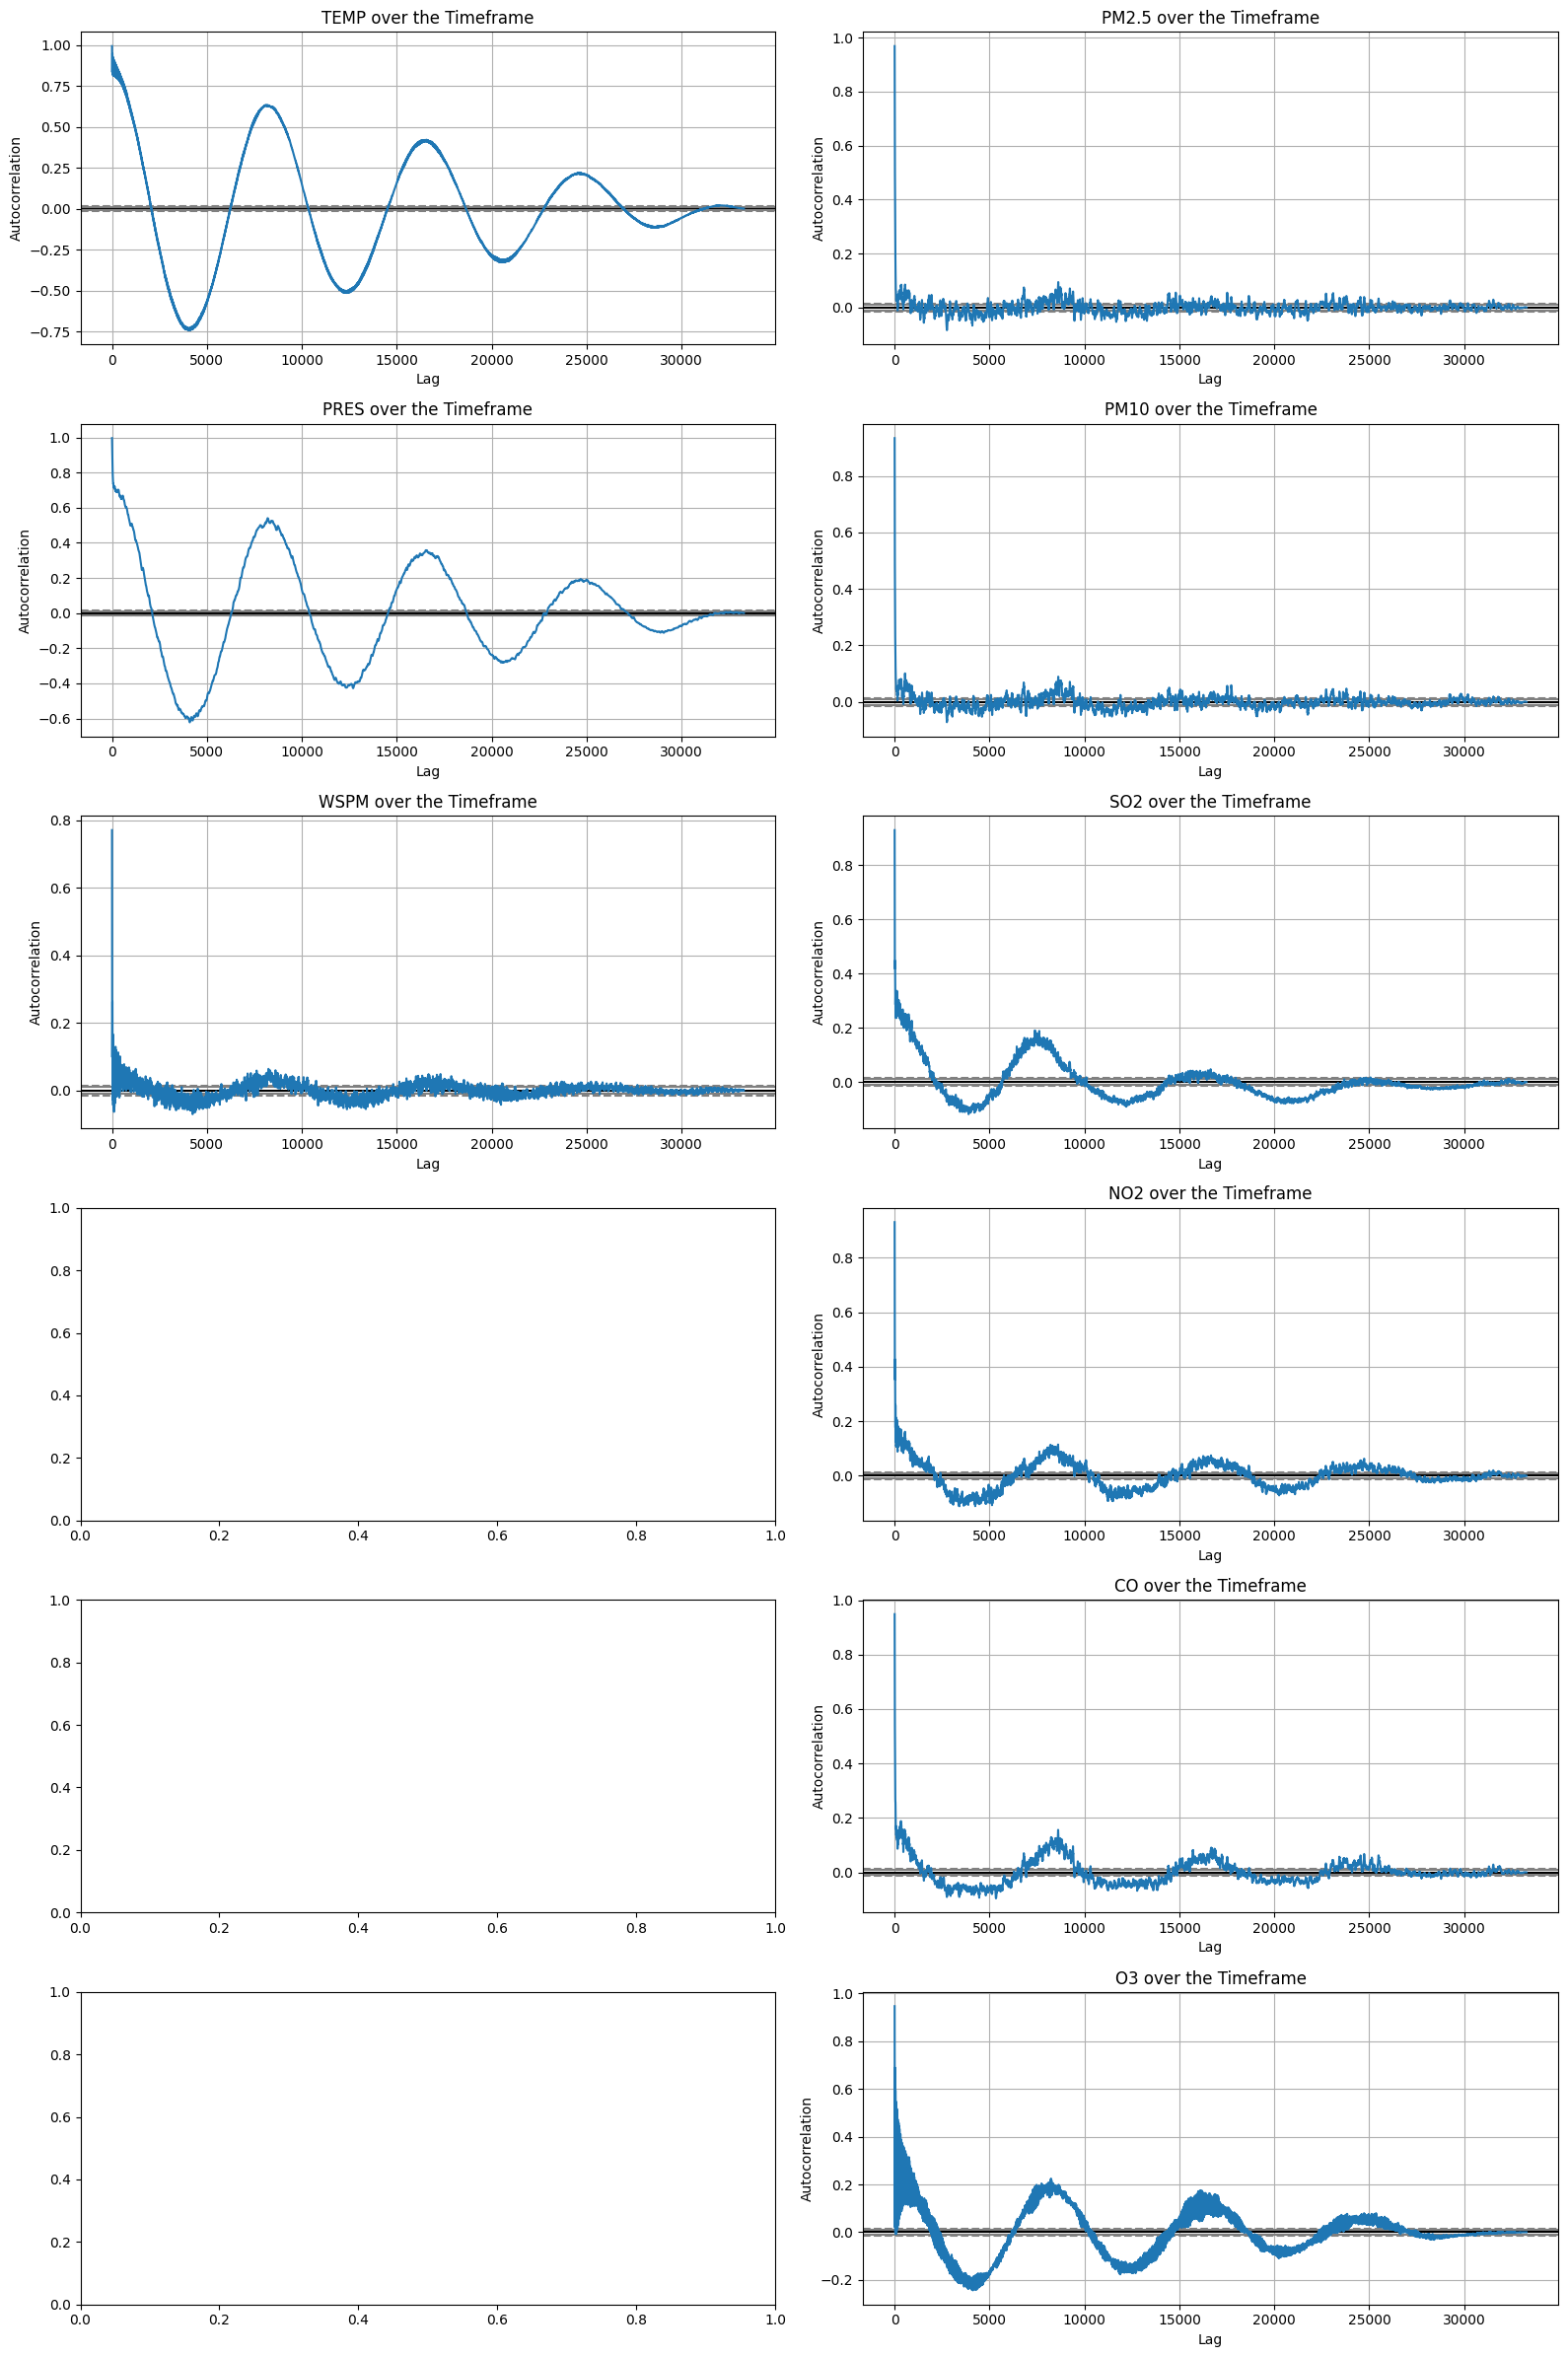

In [18]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(ncols=2, nrows=6, figsize=(16,24))

autocorrelation_plot(df_0['TEMP'], ax=ax[0,0])
ax[0,0].set_title("TEMP over the Timeframe")

autocorrelation_plot(df_0['PRES'], ax=ax[1,0])
ax[1,0].set_title("PRES over the Timeframe")

autocorrelation_plot(df_0['WSPM'], ax=ax[2,0])
ax[2,0].set_title("WSPM over the Timeframe")


autocorrelation_plot(df_0['PM2.5'], ax=ax[0,1])
ax[0,1].set_title("PM2.5 over the Timeframe")

autocorrelation_plot(df_0['PM10'], ax=ax[1,1])
ax[1,1].set_title("PM10 over the Timeframe")

autocorrelation_plot(df_0['SO2'], ax=ax[2,1])
ax[2,1].set_title("SO2 over the Timeframe")

autocorrelation_plot(df_0['NO2'], ax=ax[3,1])
ax[3,1].set_title("NO2 over the Timeframe")

autocorrelation_plot(df_0['CO'], ax=ax[4,1])
ax[4,1].set_title("CO over the Timeframe")

autocorrelation_plot(df_0['O3'], ax=ax[5,1])
ax[5,1].set_title("O3 over the Timeframe")

plt.tight_layout()

In [19]:
df_0.columns

Index(['index', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES',
       'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'timestamp'],
      dtype='object')

In [20]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your data
data = df_0[['timestamp', 'PM2.5']]
data = data.rename(columns={"timestamp": "ds", "PM2.5": "y"})

# # Split data into train and test sets (70:30 ratio)
# from sklearn.model_selection import train_test_split

# train_data, test_data = train_test_split(data, test_size=0.3)
# train_data.sort_values(by=['ds'])
# test_data.sort_values(by=['ds'])

# Split data into train and test sets (70:30 ratio)
train_size = int(len(data) * 0.7)
train_data = data[:train_size]
test_data = data[train_size:]

In [21]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_data)

# Make predictions
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)
print(train_data)
print("*******************************************************")
print(test_data)
print("*******************************************************")
print(future)
print("*******************************************************")
print(forecast)

00:38:24 - cmdstanpy - INFO - Chain [1] start processing
00:38:33 - cmdstanpy - INFO - Chain [1] done processing


                       ds      y
0     2013-03-01 00:00:00    6.0
1     2013-03-01 01:00:00    6.0
2     2013-03-01 02:00:00    6.0
3     2013-03-01 03:00:00    6.0
4     2013-03-01 04:00:00    5.0
...                   ...    ...
23293 2015-12-28 14:00:00   61.0
23294 2015-12-28 15:00:00   67.0
23295 2015-12-28 16:00:00  111.0
23296 2015-12-28 17:00:00  119.0
23297 2015-12-28 18:00:00  128.0

[23298 rows x 2 columns]
*******************************************************
                       ds      y
23298 2015-12-28 19:00:00  144.0
23299 2015-12-28 20:00:00  154.0
23300 2015-12-28 21:00:00  173.0
23301 2015-12-28 22:00:00  195.0
23302 2015-12-28 23:00:00  231.0
...                   ...    ...
33278 2017-02-28 15:00:00    9.0
33279 2017-02-28 16:00:00   10.0
33280 2017-02-28 21:00:00   18.0
33281 2017-02-28 22:00:00   15.0
33282 2017-02-28 23:00:00   15.0

[9985 rows x 2 columns]
*******************************************************
                       ds
0     2013-03-01 00

In [22]:
forecast = forecast[:(len(train_data) + len(test_data))]

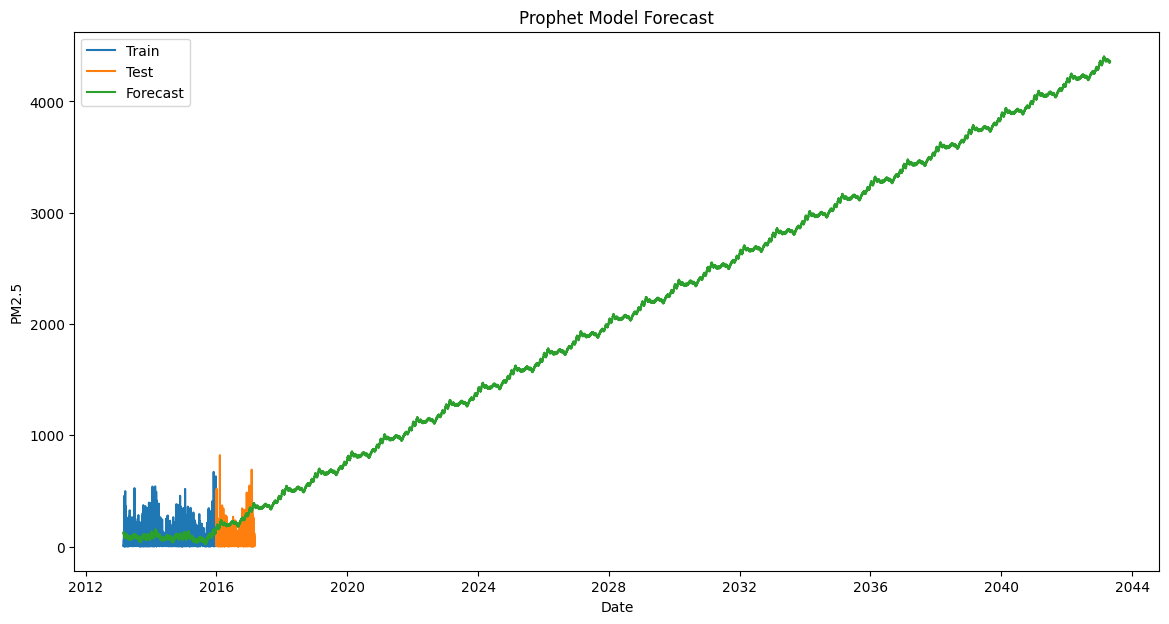

RMSE: 2484.255699227736
MAE: 2172.744826896671


In [23]:
# Plot train, test, and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(train_data.sort_values(by=['ds'])['ds'], train_data.sort_values(by=['ds'])['y'], label='Train')
plt.plot(test_data.sort_values(by=['ds'])['ds'], test_data.sort_values(by=['ds'])['y'], label='Test')
plt.plot(forecast.sort_values(by=['ds'])['ds'], forecast.sort_values(by=['ds'])['yhat'], label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Prophet Model Forecast')
plt.show()

# Calculate accuracy (you may need to define your own metric based on your specific requirements)
# For example, you could calculate RMSE or MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(test_data['y'], forecast.loc[train_size:, 'yhat'].values, squared=False)
mae = mean_absolute_error(test_data['y'], forecast.loc[train_size:, 'yhat'].values)
print("RMSE:", rmse)
print("MAE:", mae)

In [24]:
df_0.set_index('timestamp', inplace=True)
df_0

,index,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
timestamp,,,,,,,,,,,,,,
2013-03-01 00:00:00,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01 01:00:00,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2013-03-01 02:00:00,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
2013-03-01 03:00:00,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
2013-03-01 04:00:00,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 15:00:00,35055,9.0,9.0,2.0,22.0,300.0,91.0,15.4,1013.0,-15.0,0.0,NNW,3.3,Tiantan
2017-02-28 16:00:00,35056,10.0,29.0,3.0,21.0,300.0,94.0,14.9,1012.6,-15.4,0.0,NW,2.1,Tiantan
2017-02-28 21:00:00,35061,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan


<Axes: xlabel='timestamp'>

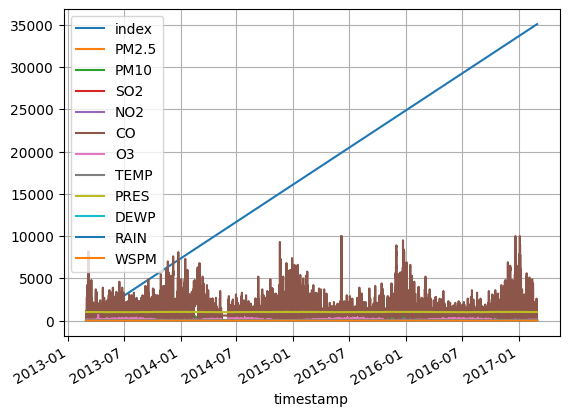

In [25]:
%matplotlib inline
df_0.plot(grid='on')

In [26]:
df = df_0['SO2']

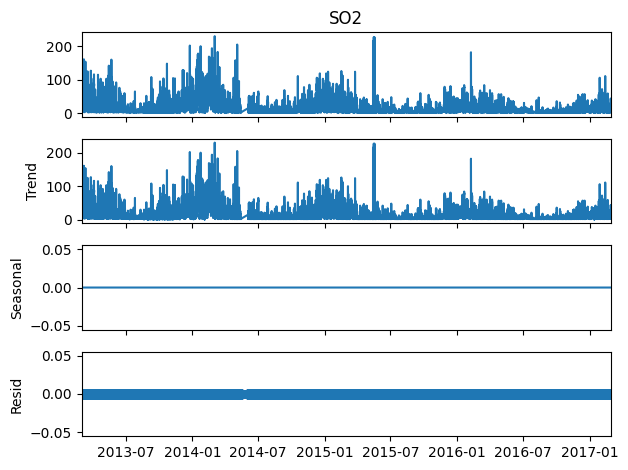

In [27]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df,period=1, model='additive')
fig = decomposition.plot()

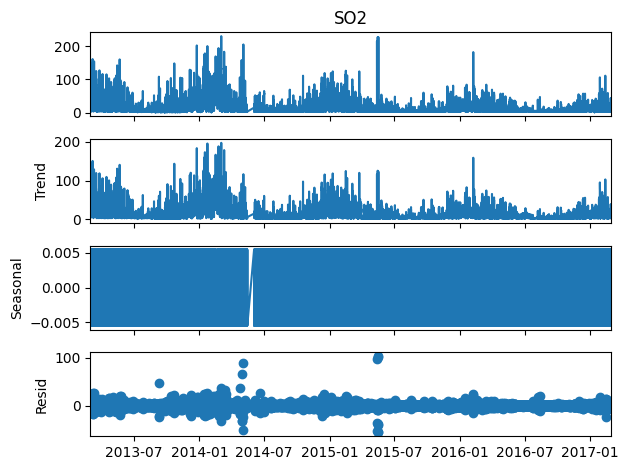

In [28]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df,period=2, model='additive')
fig = decomposition.plot()

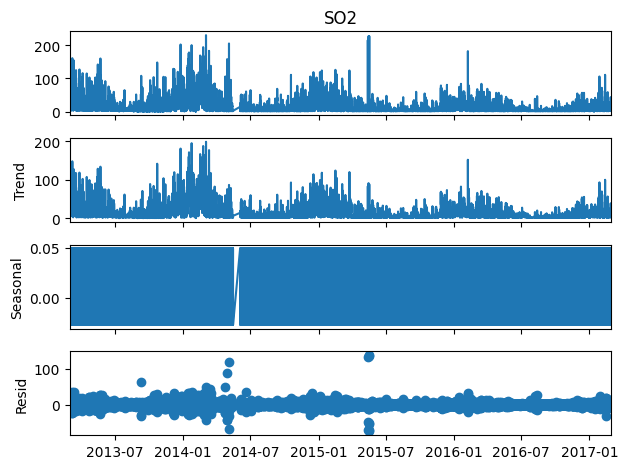

In [29]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df,period=3, model='additive')
fig = decomposition.plot()

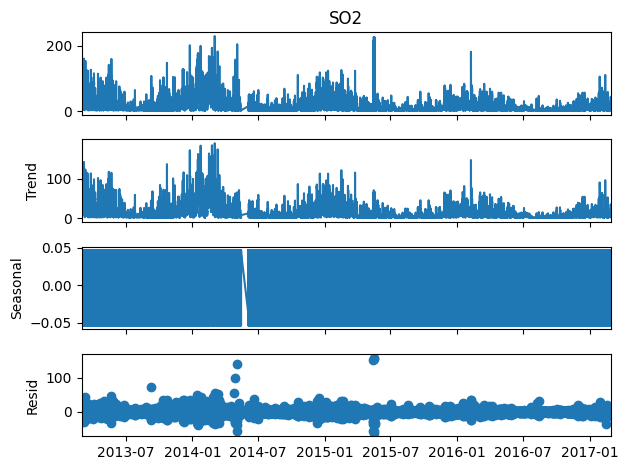

In [30]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df,period=4, model='additive')
fig = decomposition.plot()

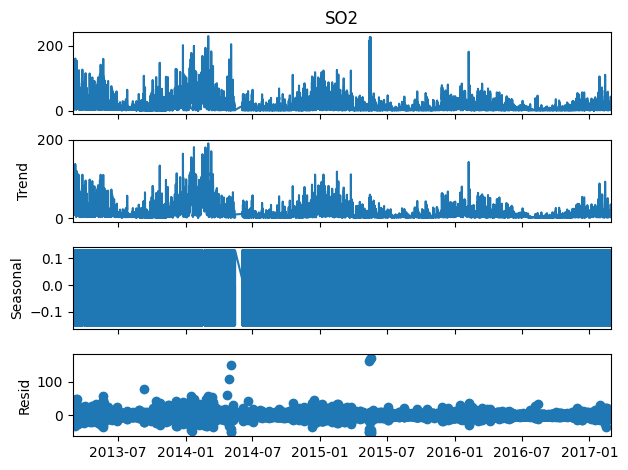

In [31]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df,period=5, model='additive')
fig = decomposition.plot()

In [32]:
df_0

,index,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
timestamp,,,,,,,,,,,,,,
2013-03-01 00:00:00,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01 01:00:00,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2013-03-01 02:00:00,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
2013-03-01 03:00:00,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
2013-03-01 04:00:00,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 15:00:00,35055,9.0,9.0,2.0,22.0,300.0,91.0,15.4,1013.0,-15.0,0.0,NNW,3.3,Tiantan
2017-02-28 16:00:00,35056,10.0,29.0,3.0,21.0,300.0,94.0,14.9,1012.6,-15.4,0.0,NW,2.1,Tiantan
2017-02-28 21:00:00,35061,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan


In [33]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import pandas as pd
df_0.columns

Index(['index', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES',
       'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [34]:
model = ARIMA(df_0['index'], order=(5,1,0))
model_fit = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  index   No. Observations:                33283
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -80577.998
Date:                Wed, 24 Apr 2024   AIC                         161167.995
Time:                        00:39:08   BIC                         161218.472
Sample:                             0   HQIC                        161184.112
                              - 33283                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0894      0.000    223.708      0.000       0.089       0.090
ar.L2          0.0900      0.000    226.447      0.000       0.089       0.091
ar.L3          0.0931      0.000    241.635      0.0

<Axes: xlabel='timestamp'>

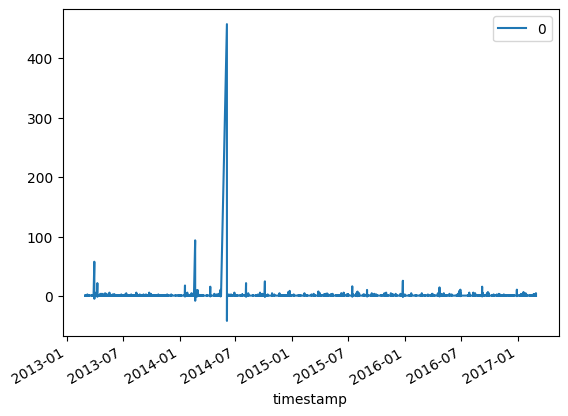

In [36]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

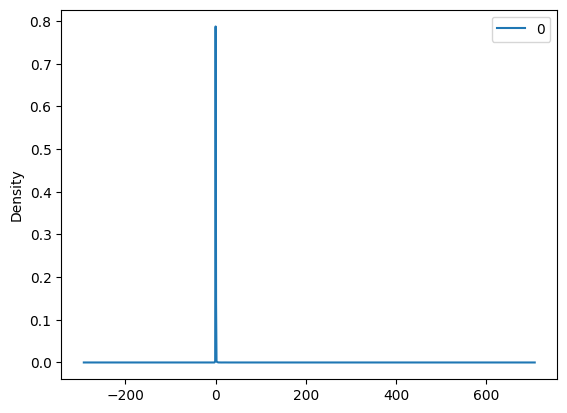

                  0
count  33283.000000
mean       0.578564
std        2.661920
min      -41.994301
25%        0.549129
50%        0.549129
75%        0.549129
max      457.362944


In [37]:
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [38]:
# # evaluate an ARIMA model using a walk-forward validation
# from matplotlib import pyplot
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# # split into train and test sets
# X = df_0['index']
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# # walk-forward validation
# for t in range(len(test)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
    
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

In [39]:
from statsmodels.tsa.stattools import adfuller, acf

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [41]:
# specify training data
data = df_0['PM2.5']
# specify additional data
other_data = df_0['TEMP']
# define model
model = SARIMAX(data, exog=other_data)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [42]:
# fit model
model_fit = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43678D+00    |proj g|=  1.37659D-02


 This problem is unconstrained.



At iterate    5    f=  4.41255D+00    |proj g|=  8.71602D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      8      1     0     0   4.019D-06   4.413D+00
  F =   4.4125407716560190     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [43]:
# # specify training data
# data = ...
# # define model
# model = SARIMAX(data, order=..., seasonal_order=...)
# # fit model
# model_fit = model.fit()
# # one step forecast
# yhat = model_fit.forecast()

In [44]:
# # specify training data
# data = ...
# # define model
# model = SARIMAX(data, order=..., seasonal_order=...)
# # fit model
# model_fit = model.fit()
# # one step forecast
# yhat = model_fit.predict(start=len(data), end=len(data))

In [45]:
# # fit an ARIMA model and plot residual errors
# from statsmodels.tsa.arima.model import ARIMA
# from matplotlib import pyplot
# # load dataset
# series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# series.index = series.index.to_period('M')
# # fit model
# model = ARIMA(series, order=(5,1,0))
# model_fit = model.fit()
# # summary of fit model
# print(model_fit.summary())
# # line plot of residuals
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

In [46]:
# #import libraries and packages:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import SimpleRNN
# from keras.layers import Dropout

# #Initialize RNN:
# regressor = Sequential()

# #Adding the first RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (df_0['PM2.5'].shape[1],1)))
# regressor.add(Dropout(0.2))

# #Adding the second RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
# regressor.add(Dropout(0.2))

# #Adding the third RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
# regressor.add(Dropout(0.2))

# #Adding the fourth RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50))
# regressor.add(Dropout(0.2))

# #Adding the output layer
# regressor.add(Dense(units = 1))

# #Compile the RNN
# regressor.compile(optimizer='adam', loss='mean_squared_error')

# #Fitting the RNN to the Training set
# regressor.fit(X_train, y_train, epochs=100, batch_size=32)

In [47]:
import tensorflow as tf
import keras
from keras import layers

2024-04-24 00:39:20.448563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 00:39:20.448693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 00:39:20.583789: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [48]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None,))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(
    encoder_input
)

# Return states in addition to output
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(
    encoder_embedded
)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(
    decoder_input
)

# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(64, name="decoder")(
    decoder_embedded, initial_state=encoder_state
)
output = layers.Dense(10)(decoder_output)

model = keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, None, 64)  │     64,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, None, 64)  │    128,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder (LSTM)      │ [(None, 64),      │     33,024 │ embedding_2[0][0] │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder (LSTM)      │ (None, 64)        │     33,024 │ embedding_3[0][0… │
│                     │                   │            │ encoder[0][1],    │
│                     │                   │            │ encoder[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10)        │        650 │ decoder[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 258,698 (1010.54 KB)

 Trainable params: 258,698 (1010.54 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
output = lstm_layer(paragraph3)

# reset_states() will reset the cached state to the original initial_state.
# If no initial_state was provided, zero-states will be used by default.
lstm_layer.reset_states()

In [52]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)

existing_state = lstm_layer.states

new_lstm_layer = layers.LSTM(64)
new_output = new_lstm_layer(paragraph3, initial_state=existing_state)

In [53]:
model = keras.Sequential()

model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 5, 128)         │        38,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9


# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [55]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [56]:
model = build_model(allow_cudnn_kernel=True)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5786 - loss: 1.3091 - val_accuracy: 0.8496 - val_loss: 0.4829


In [57]:
noncudnn_model = build_model(allow_cudnn_kernel=False)
noncudnn_model.set_weights(model.get_weights())
noncudnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)
noncudnn_model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

 31/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8406 - loss: 0.5019

I0000 00:00:1713919186.141602      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8675 - loss: 0.4347 - val_accuracy: 0.9195 - val_loss: 0.2608


Predicted result is: [3], target result is: 5


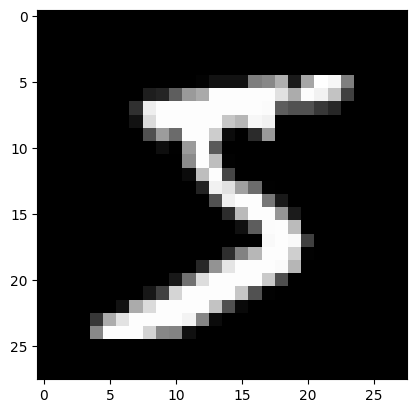

In [58]:
import matplotlib.pyplot as plt

with tf.device("CPU:0"):
    cpu_model = build_model(allow_cudnn_kernel=True)
    cpu_model.set_weights(model.get_weights())
    result = tf.argmax(cpu_model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap=plt.get_cmap("gray"))

In [59]:
@keras.saving.register_keras_serializable()
class NestedCell(keras.layers.Layer):
    def __init__(self, unit_1, unit_2, unit_3, **kwargs):
        self.unit_1 = unit_1
        self.unit_2 = unit_2
        self.unit_3 = unit_3
        self.state_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        self.output_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        super().__init__(**kwargs)

    def build(self, input_shapes):
        # expect input_shape to contain 2 items, [(batch, i1), (batch, i2, i3)]
        i1 = input_shapes[0][1]
        i2 = input_shapes[1][1]
        i3 = input_shapes[1][2]

        self.kernel_1 = self.add_weight(
            shape=(i1, self.unit_1), initializer="uniform", name="kernel_1"
        )
        self.kernel_2_3 = self.add_weight(
            shape=(i2, i3, self.unit_2, self.unit_3),
            initializer="uniform",
            name="kernel_2_3",
        )

    def call(self, inputs, states):
        # inputs should be in [(batch, input_1), (batch, input_2, input_3)]
        # state should be in shape [(batch, unit_1), (batch, unit_2, unit_3)]
        input_1, input_2 = tf.nest.flatten(inputs)
        s1, s2 = states

        output_1 = tf.matmul(input_1, self.kernel_1)
        output_2_3 = tf.einsum("bij,ijkl->bkl", input_2, self.kernel_2_3)
        state_1 = s1 + output_1
        state_2_3 = s2 + output_2_3

        output = (output_1, output_2_3)
        new_states = (state_1, state_2_3)

        return output, new_states

    def get_config(self):
        return {"unit_1": self.unit_1, "unit_2": self.unit_2, "unit_3": self.unit_3}

In [60]:
# unit_1 = 10
# unit_2 = 20
# unit_3 = 30

# i1 = 32
# i2 = 64
# i3 = 32
# batch_size = 64
# num_batches = 10
# timestep = 50

# cell = NestedCell(unit_1, unit_2, unit_3)
# rnn = keras.layers.RNN(cell)

# input_1 = keras.Input((None, i1))
# input_2 = keras.Input((None, i2, i3))

# outputs = rnn((input_1, input_2))

# model = keras.models.Model([input_1, input_2], outputs)

# model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [61]:
# input_1_data = np.random.random((batch_size * num_batches, timestep, i1))
# input_2_data = np.random.random((batch_size * num_batches, timestep, i2, i3))
# target_1_data = np.random.random((batch_size * num_batches, unit_1))
# target_2_data = np.random.random((batch_size * num_batches, unit_2, unit_3))
# input_data = [input_1_data, input_2_data]
# target_data = [target_1_data, target_2_data]

# model.fit(input_data, target_data, batch_size=batch_size)